Filtered interactions:
MAPK1	EIF4EBP1	experimentally confirmed (prob. 0.485)
MAPK1	EIF4EBP1	experimentally confirmed (prob. 0.485)
MAPK1	MAPK3	experimentally confirmed (prob. 0.887)
MAPK1	MAPK3	experimentally confirmed (prob. 0.887)
MAPK1	FOS	experimentally confirmed (prob. 0.578)
MAPK1	FOS	experimentally confirmed (prob. 0.578)
MAPK1	JUN	experimentally confirmed (prob. 0.867)
MAPK1	JUN	experimentally confirmed (prob. 0.867)
RPS6KB1	AKT1	experimentally confirmed (prob. 0.764)
RPS6KB1	AKT1	experimentally confirmed (prob. 0.764)
RPS6KB1	RPS6	experimentally confirmed (prob. 0.809)
RPS6KB1	RPS6	experimentally confirmed (prob. 0.809)
RPS6KB1	MTOR	experimentally confirmed (prob. 0.992)
RPS6KB1	MTOR	experimentally confirmed (prob. 0.992)
MAPK3	FOS	experimentally confirmed (prob. 0.427)
MAPK3	FOS	experimentally confirmed (prob. 0.427)
MAPK3	JUN	experimentally confirmed (prob. 0.500)
MAPK3	JUN	experimentally confirmed (prob. 0.500)
FOS	JUN	experimentally confirmed (prob. 0.985)
FOS	JUN	experime

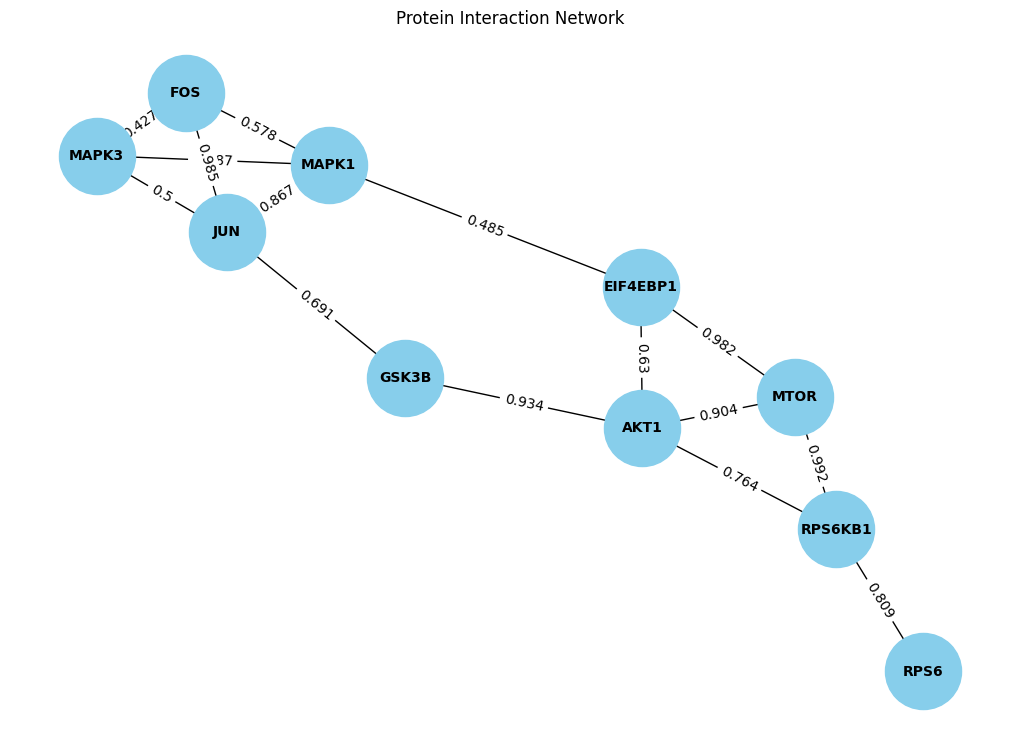

In [2]:

import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# STRING API URL and parameters
STRING_API_URL = "https://version-11-5.string-db.org/api"
OUTPUT_FORMAT = "tsv-no-header"
METHOD = "network"

def fetch_string_data(genes, species=9606, caller_identity="www.awesome_app.org"):
    """
    Fetch protein interaction data from STRING database for a given list of genes.
    """
    request_url = "/".join([STRING_API_URL, OUTPUT_FORMAT, METHOD])
    params = {
        "identifiers": "%0d".join(genes),
        "species": species,
        "caller_identity": caller_identity
    }
    
    response = requests.post(request_url, data=params)
    data = [line.split("\t") for line in response.text.strip().split("\n")]
    
    columns = [
        "stringId_A", "stringId_B", "preferredName_A", "preferredName_B", "ncbiTaxonId", 
        "score", "nscore", "fscore", "pscore", "ascore", "escore", "dscore", "tscore"
    ]
    
    df = pd.DataFrame(data[1:], columns=columns)  # Skip the header row
    return df

def filter_interactions(df, score_threshold=0.4):
    """
    Filter interactions based on experimental confidence score.
    """
    return df[df['escore'].astype(float) > score_threshold]

def save_to_csv(df, filename):
    """
    Save the DataFrame to a CSV file.
    """
    df.to_csv(filename, index=False)

def print_interactions(df):
    """
    Print interactions with medium or higher confidence experimental score.
    """
    for _, row in df.iterrows():
        experimental_score = float(row['escore'])
        p1 = row['preferredName_A']
        p2 = row['preferredName_B']
        print(f"{p1}\t{p2}\texperimentally confirmed (prob. {experimental_score:.3f})")

def plot_interaction_network(df, seed=42):
    """
    Plot the protein interaction network.
    """
    G = nx.Graph()
    
    for _, row in df.iterrows():
        p1 = row['preferredName_A']
        p2 = row['preferredName_B']
        score = float(row['escore'])
        G.add_edge(p1, p2, weight=score)
    
    pos = nx.spring_layout(G, seed=seed)
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold")
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Protein Interaction Network")
    plt.show()

def analyze_protein_interactions(genes, output_file, threshold):
    df = fetch_string_data(genes)
    filtered_df = filter_interactions(df, score_threshold=threshold)
    save_to_csv(filtered_df, output_file)
    
    print("Filtered interactions:")
    print_interactions(filtered_df)
    
    print(f"\nInteraction data saved to {output_file}")
    
    plot_interaction_network(filtered_df)

# Example usage 
genes = ["AKT1", "GSK3B", "MTOR", "MAPK1", "MAPK3", "JUN", "FOS", "RPS6KB1", "RPS6", "EIF4EBP1"]
output_file = "PPI_network_filtered_test.csv"
threshold = 0.4
analyze_protein_interactions(genes, output_file, threshold)
